In [1]:
import pymysql

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
conn = pymysql.connect(database='employees', user='root', password='Sep032016!')

In [3]:
cursor = conn.cursor()

In [4]:
query = "DESC employees"

In [5]:
cursor.execute(query)

6

In [6]:
 output = cursor.fetchall()

In [8]:
df = pd.DataFrame(output)

In [9]:
df

,0,1,2,3,4,5
0,emp_no,int,NO,PRI,None,
1,birth_date,date,NO,,None,
2,first_name,varchar(14),NO,,None,
3,last_name,varchar(16),NO,,None,
4,gender,"enum('M','F')",NO,,None,
5,hire_date,date,NO,,None,


In [10]:
query = "DESC dept_manager"
cursor.execute(query)

4

In [11]:
output = cursor.fetchall()
df = pd.DataFrame(output)
df

,0,1,2,3,4,5
0,emp_no,int,NO,PRI,None,
1,dept_no,char(4),NO,PRI,None,
2,from_date,date,NO,,None,
3,to_date,date,NO,,None,


In [12]:
query = "DESC departments"
cursor.execute(query)

2

In [13]:
output = cursor.fetchall()
df = pd.DataFrame(output)
df

,0,1,2,3,4,5
0,dept_no,char(4),NO,PRI,None,
1,dept_name,varchar(40),NO,UNI,None,


In [14]:
query = "DESC titles"
cursor.execute(query)

4

In [15]:
output = cursor.fetchall()
df = pd.DataFrame(output)
df

,0,1,2,3,4,5
0,emp_no,int,NO,PRI,None,
1,title,varchar(50),NO,PRI,None,
2,from_date,date,NO,PRI,None,
3,to_date,date,YES,,None,


In [16]:
query = "DESC salaries"
cursor.execute(query)

4

In [17]:
output = cursor.fetchall()
df = pd.DataFrame(output)
df

,0,1,2,3,4,5
0,emp_no,int,NO,PRI,None,
1,salary,int,NO,,None,
2,from_date,date,NO,PRI,None,
3,to_date,date,NO,,None,


In [18]:
query = "DESC dept_emp"
cursor.execute(query)

4

In [19]:
output = cursor.fetchall()
df = pd.DataFrame(output)
df

,0,1,2,3,4,5
0,emp_no,int,NO,PRI,None,
1,dept_no,char(4),NO,PRI,None,
2,from_date,date,NO,,None,
3,to_date,date,NO,,None,


In [20]:
# Return number of different department numbers
query = "SELECT COUNT(DISTINCT dept_no) FROM dept_emp;"
cursor.execute(query)
output = cursor.fetchall()
df = pd.DataFrame(output)
df

,0
0,9


In [21]:
# Return max and min of hire date
query = "SELECT MIN(hire_date), MAX(hire_date) FROM employees;"
cursor.execute(query)
output = cursor.fetchall()
df = pd.DataFrame(output)
df

,0,1
0,1985-01-01,2000-01-28


In [22]:
# Return information about Managers
query = "SELECT e.emp_no, e.first_name, e.last_name, dm.dept_no, e.hire_date, t.title\
        FROM employees e JOIN dept_manager dm ON e.emp_no = dm.emp_no\
        JOIN titles t ON e.emp_no = t.emp_no\
        WHERE t.title = 'Manager'\
        ORDER BY e.emp_no;"
cursor.execute(query)
output = cursor.fetchall()
df = pd.DataFrame(output)
df

,0,1,2,3,4,5
0,110022,Margareta,Markovitch,d001,1985-01-01,Manager
1,110039,Vishwani,Minakawa,d001,1986-04-12,Manager
2,110085,Ebru,Alpin,d002,1985-01-01,Manager
3,110114,Isamu,Legleitner,d002,1985-01-14,Manager
4,110183,Shirish,Ossenbruggen,d003,1985-01-01,Manager
5,110228,Karsten,Sigstam,d003,1985-08-04,Manager
6,110303,Krassimir,Wegerle,d004,1985-01-01,Manager
7,110344,Rosine,Cools,d004,1985-11-22,Manager
8,110386,Shem,Kieras,d004,1988-10-14,Manager
9,110420,Oscar,Ghazalie,d004,1992-02-05,Manager


In [23]:
# Return number of different titles
query = "SELECT COUNT(DISTINCT title) FROM titles;"
cursor.execute(query)
output = cursor.fetchall()
df = pd.DataFrame(output)
df

,0
0,7


In [27]:
# Return list of different titles
query = "SELECT DISTINCT title FROM titles;"
cursor.execute(query)
output = cursor.fetchall()
titleDistinct = pd.DataFrame(output)
titleDistinct

,0
0,Senior Engineer
1,Staff
2,Engineer
3,Senior Staff
4,Assistant Engineer
5,Technique Leader
6,Manager


In [34]:
# Return list of Senior Engineer salaries who were hired on or after Jan 1, 1997
query = "SELECT s.salary, t.title, e.emp_no, e.gender, e.hire_date\
          FROM salaries s JOIN titles t ON t.emp_no = s.emp_no\
          JOIN employees e on e.emp_no = s.emp_no\
          WHERE title = 'Senior Engineer'\
          AND hire_date >= '1997-01-01';"
cursor.execute(query)
output = cursor.fetchall()
sen_eng = pd.DataFrame(output)
sen_eng

,0,1,2,3,4
0,40788,Senior Engineer,10218,M,1997-01-15
1,43246,Senior Engineer,10218,M,1997-01-15
2,47492,Senior Engineer,10218,M,1997-01-15
3,51464,Senior Engineer,10218,M,1997-01-15
4,51133,Senior Engineer,10218,M,1997-01-15
...,...,...,...,...,...
2109,63339,Senior Engineer,201352,M,1997-04-09
2110,66185,Senior Engineer,201352,M,1997-04-09
2111,68339,Senior Engineer,201352,M,1997-04-09
2112,60968,Senior Engineer,201377,F,1997-03-30


In [35]:
# Return list of Engineer salaries who were hired on or after Jan 1, 1997
query = "SELECT s.salary, t.title, e.emp_no, e.gender, e.hire_date\
          FROM salaries s JOIN titles t ON t.emp_no = s.emp_no\
          JOIN employees e on e.emp_no = s.emp_no\
          WHERE title = 'Engineer'\
          AND hire_date >= '1997-01-01';"
cursor.execute(query)
output = cursor.fetchall()
mid_eng = pd.DataFrame(output)
mid_eng

,0,1,2,3,4
0,40000,Engineer,10139,F,1998-03-15
1,42450,Engineer,10139,F,1998-03-15
2,45161,Engineer,10139,F,1998-03-15
3,48746,Engineer,10139,F,1998-03-15
4,50398,Engineer,10139,F,1998-03-15
...,...,...,...,...,...
6031,76378,Engineer,201689,F,1999-08-23
6032,77448,Engineer,201689,F,1999-08-23
6033,60089,Engineer,201741,M,1999-02-03
6034,60953,Engineer,201741,M,1999-02-03


In [39]:
print('Senior Enigeer avg salary:', sen_eng[0].mean())
print('Mid-Enigeer avg salary:', mid_eng[0].mean())

Senior Enigeer avg salary: 52095.87086092715
Mid-Enigeer avg salary: 52387.410868124585


In [48]:
Engineers = pd.concat([sen_eng, mid_eng])
Engineers.columns = ['salary', 'title', 'emp_no', 'gender', 'hire_date']
Engineers.head()

,salary,title,emp_no,gender,hire_date
0,40788,Senior Engineer,10218,M,1997-01-15
1,43246,Senior Engineer,10218,M,1997-01-15
2,47492,Senior Engineer,10218,M,1997-01-15
3,51464,Senior Engineer,10218,M,1997-01-15
4,51133,Senior Engineer,10218,M,1997-01-15


In [49]:
Engineers.tail()

,salary,title,emp_no,gender,hire_date
6031,76378,Engineer,201689,F,1999-08-23
6032,77448,Engineer,201689,F,1999-08-23
6033,60089,Engineer,201741,M,1999-02-03
6034,60953,Engineer,201741,M,1999-02-03
6035,62789,Engineer,201741,M,1999-02-03


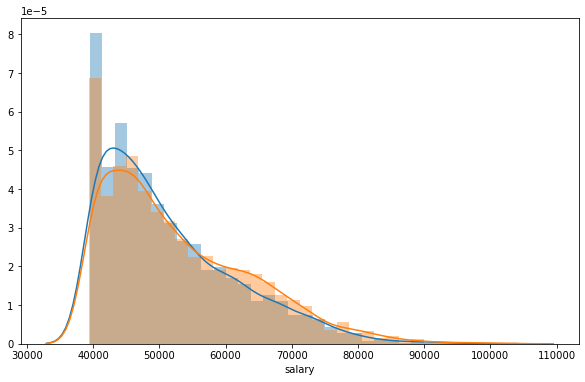

In [58]:
plt.figure(figsize=(10,6))
sns.distplot(Engineers[Engineers['gender']=='F']['salary'])
sns.distplot(Engineers[Engineers['gender']=='M']['salary'])

In [61]:
print("Female Salary mean:", Engineers[Engineers['gender']=='F']['salary'].mean())
print("Male Salary mean:", Engineers[Engineers['gender']=='M']['salary'].mean())

Female Salary mean: 51404.3175046555
Male Salary mean: 52905.107954545456


In [62]:
query = "SELECT s.salary, t.title, e.emp_no, e.gender, e.hire_date\
          FROM salaries s JOIN titles t ON t.emp_no = s.emp_no\
          JOIN employees e on e.emp_no = s.emp_no\
          WHERE title = 'Staff' OR title = 'Senior Staff'\
          AND hire_date >= '1997-01-01';"
cursor.execute(query)
output = cursor.fetchall()
Staff = pd.DataFrame(output)
Staff

,0,1,2,3,4
0,65828,Staff,10002,F,1985-11-21
1,65909,Staff,10002,F,1985-11-21
2,67534,Staff,10002,F,1985-11-21
3,69366,Staff,10002,F,1985-11-21
4,71963,Staff,10002,F,1985-11-21
...,...,...,...,...,...
347774,75831,Staff,201770,F,1992-12-06
347775,78565,Staff,201770,F,1992-12-06
347776,79584,Staff,201770,F,1992-12-06
347777,82569,Staff,201770,F,1992-12-06


In [63]:
Staff.columns = ['salary', 'title', 'emp_no', 'gender', 'hire_date']
Staff.head()

,salary,title,emp_no,gender,hire_date
0,65828,Staff,10002,F,1985-11-21
1,65909,Staff,10002,F,1985-11-21
2,67534,Staff,10002,F,1985-11-21
3,69366,Staff,10002,F,1985-11-21
4,71963,Staff,10002,F,1985-11-21


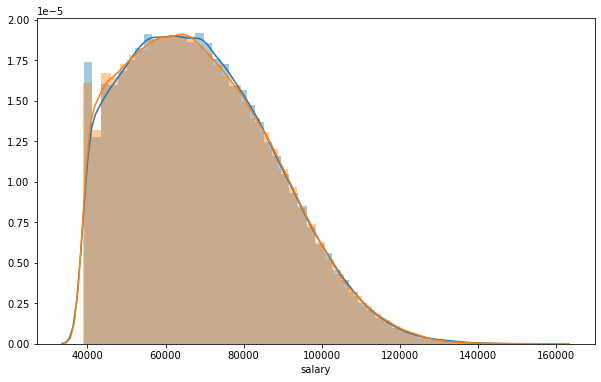

In [64]:
plt.figure(figsize=(10,6))
sns.distplot(Staff[Staff['gender']=='F']['salary'])
sns.distplot(Staff[Staff['gender']=='M']['salary'])

In [65]:
print("Female Salary mean:", Staff[Staff['gender']=='F']['salary'].mean())
print("Male Salary mean:", Staff[Staff['gender']=='M']['salary'].mean())

Female Salary mean: 69273.23976721629
Male Salary mean: 69157.50349003327


In [66]:
cursor.close()

In [67]:
conn.close()